In [ ]:
#Trying with smaller dataset
#Around 400 MB

#Trying with smaller dataset
#Around 400 MB


In [ ]:

!pip install anndata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.2/104.2 kB 1.4 MB/s eta 0:00:00


In [ ]:
import numpy as np # linear algebra
import pandas as pd
import os

import time
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#1 Code to read file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

MessageError: ignored

In [ ]:
#Tabula Sapiens Heart Cells ------>

# https://drive.google.com/file/d/1oMOjGyf14G4dcyqrQChlD4f7TK0YV2Vf/view?usp=sharing - link to dataset

#2. Get the file
#make sure you upload all your data files to your Google drive and change share->Advanced->change->anyone with the link can view
downloaded = drive.CreateFile({'id':'1oMOjGyf14G4dcyqrQChlD4f7TK0YV2Vf'}) # replace the id with id of file you want to access
downloaded.GetContentFile('TabulaSapiens_Heart_Dataset.h5ad')

In [ ]:
print(downloaded)

GoogleDriveFile({'id': '1oMOjGyf14G4dcyqrQChlD4f7TK0YV2Vf', 'kind': 'drive#file', 'userPermission': {'id': 'me', 'type': 'user', 'role': 'owner', 'kind': 'drive#permission', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1oMOjGyf14G4dcyqrQChlD4f7TK0YV2Vf/permissions/me', 'etag': '"M8mjHSH9avoYuGSf7BiAEn4tAio"', 'pendingOwner': False}, 'fileExtension': 'h5ad', 'md5Checksum': '5362c31870027d6c8e975b04ce0e5f0e', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1oMOjGyf14G4dcyqrQChlD4f7TK0YV2Vf', 'ownerNames': ['Venkata Satya Swathi Mattaparthi'], 'lastModifyingUserName': 'Venkata Satya Swathi Mattaparthi', 'editable': True, 'writersCanShare': True, 'downloadUrl': 'https://www.googleapis.com/drive/v2/files/1oMOjGyf14G4dcyqrQChlD4f7TK0YV2Vf?alt=media&source=downloadUrl', 'mimeType': 'application/octet-stream', 'parents': [{'selfLink': 'https://www.googleapis.com/drive/v2/files/1oMOjGyf14G4dcyqrQChlD4f7TK0YV2Vf/parents/1Gev5lPKGhee9oSxz20ELb93zUwMf7SAU', 'id': '1Gev5lPKGhee9oSx

In [ ]:
!pip install scanpy

In [ ]:
import scanpy as sc
import anndata
import importlib
from sklearn.decomposition import PCA

import matplotlib as mpl

In [ ]:
adata = sc.read_h5ad('TabulaSapiens_Heart_Dataset.h5ad')


In [ ]:
print(adata)

AnnData object with n_obs × n_vars = 11505 × 58604
    obs: 'assay_ontology_term_id', 'donor_id', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'sex_ontology_term_id', 'disease_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'suspension_type', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_type', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'ensembl_version', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: '_scvi', '_training_mode', 'assay_colors', 'cell_ontology_class_colors', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_prediction', 'de

In [ ]:
# View basic statistics of the data
print(adata.var_names[:10])  # View the first 10 gene names


Index(['ENSG00000223972', 'ENSG00000227232', 'ENSG00000278267',
       'ENSG00000243485', 'ENSG00000284332', 'ENSG00000237613',
       'ENSG00000268020', 'ENSG00000240361', 'ENSG00000186092',
       'ENSG00000238009'],
      dtype='object', name='ensemblid')


In [ ]:
print(adata.obs.head())     # View the first few rows of the observation (cell) data


                                           assay_ontology_term_id donor_id  \
cell_id                                                                      
AAACCCAAGAGCAAGA_TSP12_Heart_Atria_10X_1_1            EFO:0009922    TSP12   
AAACCCAAGATGGCGT_TSP12_Heart_Atria_10X_1_1            EFO:0009922    TSP12   
AAACCCAAGGGTTAAT_TSP12_Heart_Atria_10X_1_1            EFO:0009922    TSP12   
AAACCCAAGTATGCAA_TSP12_Heart_Atria_10X_1_1            EFO:0009922    TSP12   
AAACCCAAGTCGTTAC_TSP12_Heart_Atria_10X_1_1            EFO:0009922    TSP12   

                                           anatomical_information  \
cell_id                                                             
AAACCCAAGAGCAAGA_TSP12_Heart_Atria_10X_1_1                  Atria   
AAACCCAAGATGGCGT_TSP12_Heart_Atria_10X_1_1                  Atria   
AAACCCAAGGGTTAAT_TSP12_Heart_Atria_10X_1_1                  Atria   
AAACCCAAGTATGCAA_TSP12_Heart_Atria_10X_1_1                  Atria   
AAACCCAAGTCGTTAC_TSP12_Heart_Atria_10X_

In [ ]:
# Plot the distribution of the gene expression levels
adata.plot.density(x='rna')

AttributeError: ignored

In [ ]:
# Get the dimensions of the data
print("Number of Cells:", adata.n_obs)
print("Number of Genes:", adata.n_vars)

Number of Cells: 11505
Number of Genes: 58604


Dimensionality Reduction (e.g., PCA):

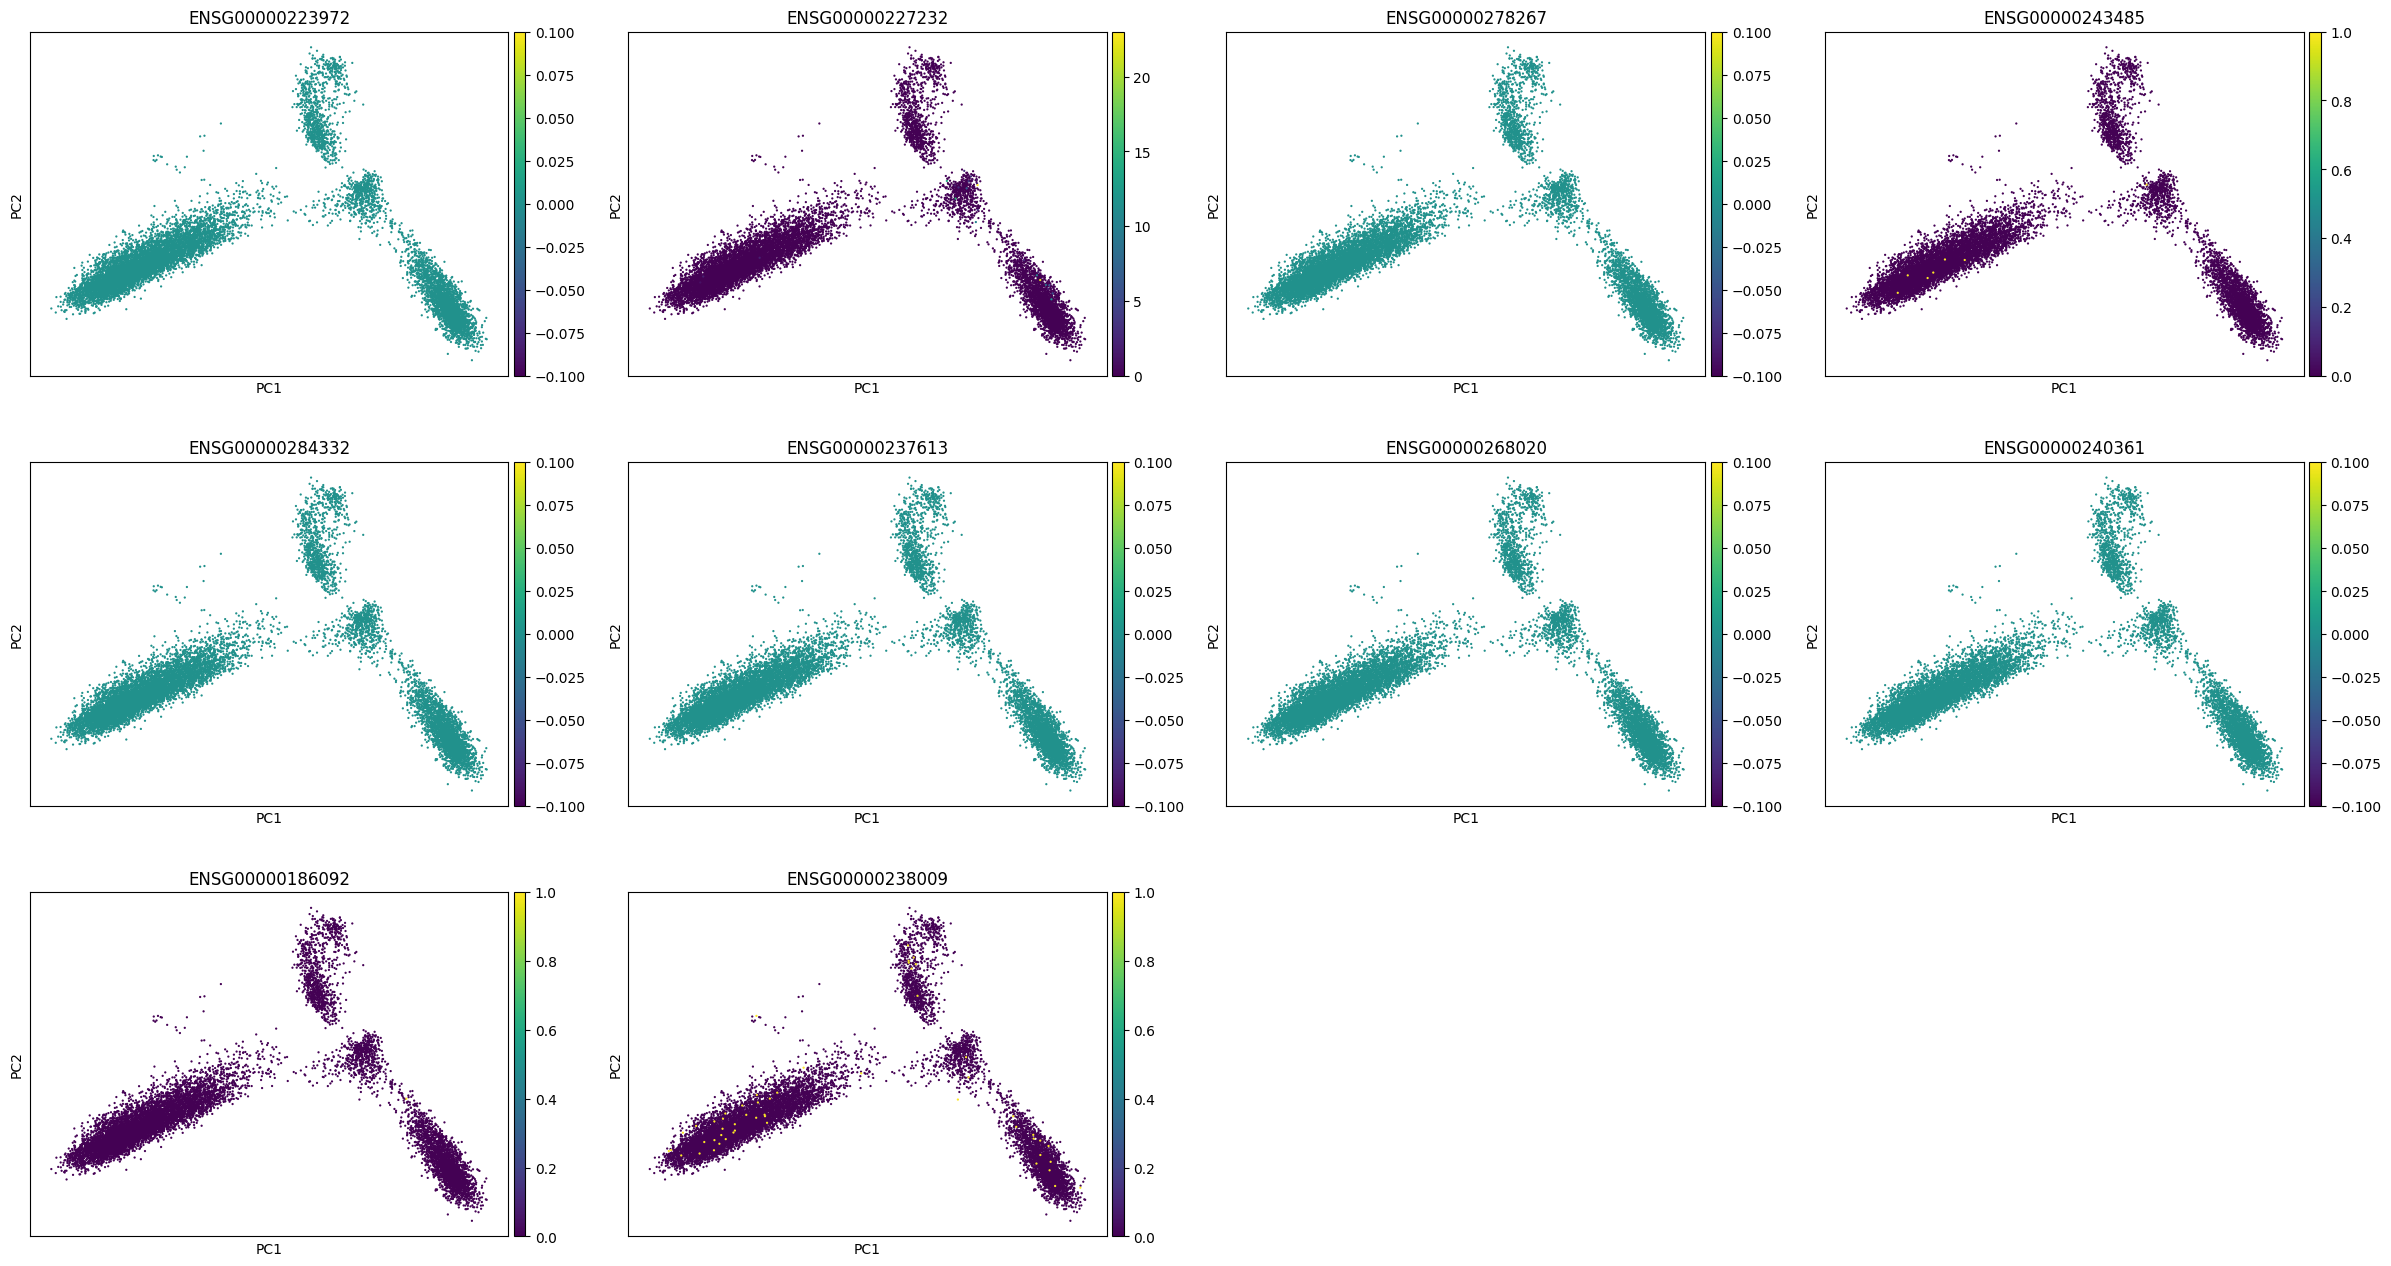

In [ ]:
sc.tl.pca(adata)
sc.pl.pca(adata, color=['ENSG00000223972', 'ENSG00000227232' , 'ENSG00000278267', 'ENSG00000243485', 'ENSG00000284332', 'ENSG00000237613', 'ENSG00000268020', 'ENSG00000240361', 'ENSG00000186092', 'ENSG00000238009' ])

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


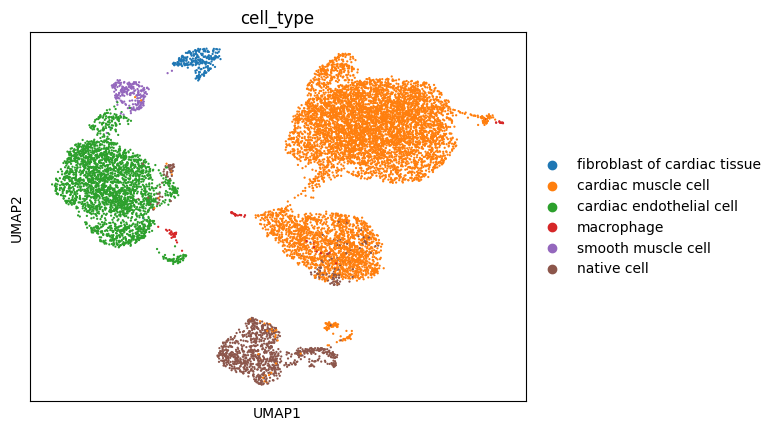

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


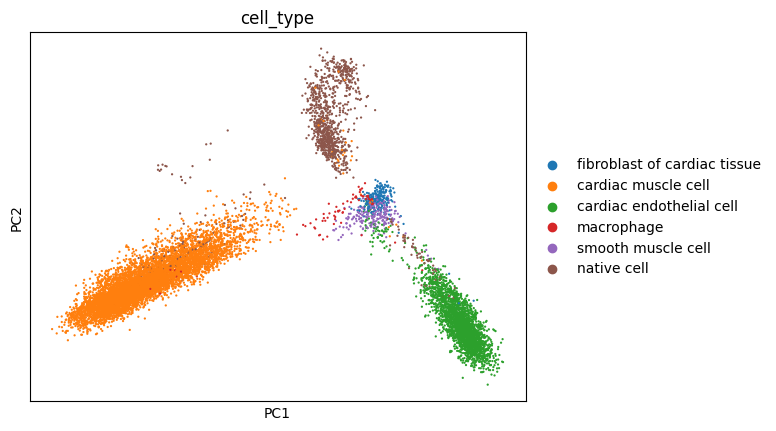

In [ ]:
# UMAP embedding
sc.pl.umap(adata, color='cell_type')

# PCA plot
sc.pl.pca(adata, color='cell_type')
